<a href="https://colab.research.google.com/github/Tanvi-Gajula/Projects/blob/main/handwritten_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HANDWRITTEN DIGITS RECOGNITION

Implementation:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [ ]:
mnist_digits = fetch_openml('mnist_784', version=1, cache=True)
mnist_digits.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist_digits

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [ ]:
x = mnist_digits["data"]
y = mnist_digits["target"]
y = y.astype(np.int)

<ipython-input-4-e4557468e633>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline

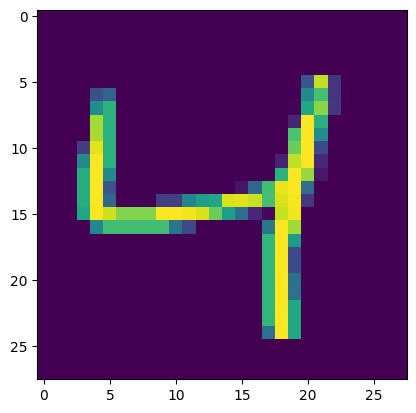

In [ ]:
sample_a = x.loc[[2]].to_numpy()
sample_b = x.loc[[25]].to_numpy()

sample_a_img = sample_a.reshape(28, 28)
sample_b_img = sample_b.reshape(28, 28)

plt.imshow(sample_a_img)
#plt.axis("off")

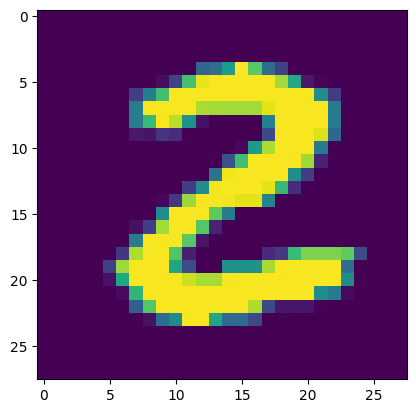

In [ ]:
plt.imshow(sample_b_img)

In [ ]:
y.loc[[2]].to_numpy()

array([4])

In [ ]:
x_train , x_test = x[:60000] , x[60000:]

In [ ]:
y_train , y_test = x[:60000] , x[60000:]

In [ ]:
import numpy as np

# Assuming x_train and y_train are NumPy arrays of the same length
shuffle_index = np.random.permutation(len(x_train))

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8718571428571429


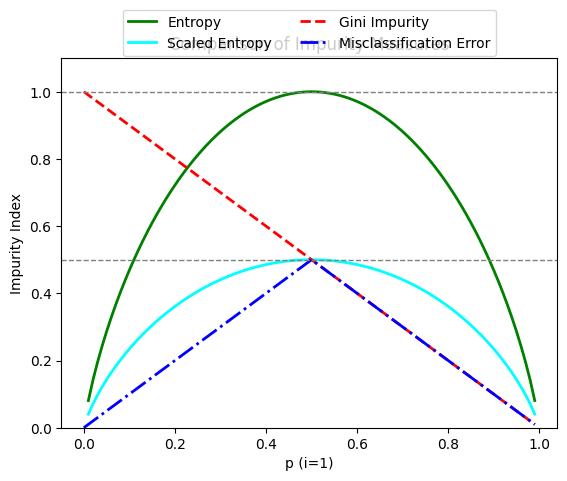

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1 - p) + (1 - p) * (1 - p)

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
gini_impurity = [gini(p) for p in x]
err = [error(p) for p in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, sc_ent, gini_impurity, err],
                         ['Entropy', 'Scaled Entropy', 'Gini Impurity', 'Misclassification Error'],
                         ['-', '-', '--', '-.'], ['green', 'cyan', 'red', 'blue']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='gray', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='gray', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p (i=1)')
plt.ylabel('Impurity Index')
plt.title('Comparison of Impurity Measures')
plt.show()

Accuracy for digit 0: 92.48%
Accuracy for digit 1: 95.00%
Accuracy for digit 2: 83.48%
Accuracy for digit 3: 83.88%
Accuracy for digit 4: 87.41%
Accuracy for digit 5: 82.01%
Accuracy for digit 6: 89.83%
Accuracy for digit 7: 90.95%
Accuracy for digit 8: 81.06%
Accuracy for digit 9: 84.01%


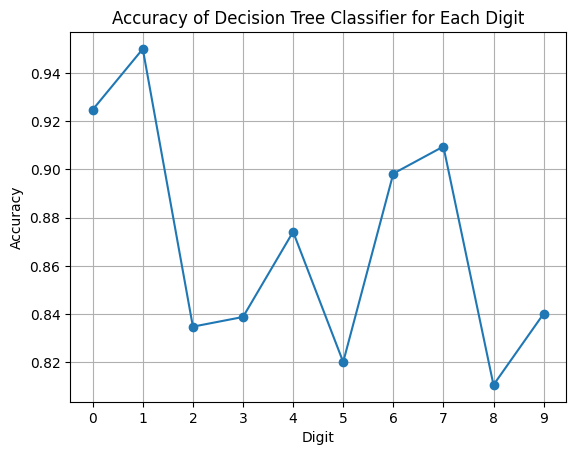

In [ ]:
accuracy_per_digit = {} #accuracy for each digit
for digit in range(10):

    mask = (y_test == digit)

    X_digit_test = x_test[mask]
    y_digit_test = y_test[mask]

    y_digit_pred = clf.predict(X_digit_test)

    accuracy = accuracy_score(y_digit_test, y_digit_pred)

    accuracy_per_digit[digit] = accuracy


for digit, accuracy in accuracy_per_digit.items():
    print(f'Accuracy for digit {digit}: {accuracy * 100:.2f}%')


plt.plot(list(accuracy_per_digit.keys()), list(accuracy_per_digit.values()), marker='o')
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree Classifier for Each Digit')
plt.xticks(list(accuracy_per_digit.keys()))
plt.grid(True)
plt.show()